# **Problem Statement**

We will learn logistic regression to a real-world prblm.

Q. The Rain in Australia dataset contains about 10 years of daily wheather observations from numerous Australian wheather stations. Here is a small sample from the dataset.

Topics:

-> Downloading a real-world dataset from kaggle.

-> Explorating data analysis and visualisation.

-> Splitting the data into training, validation & test sets.

-> Filling/imputing missin values in numeric columns.

-> Scaling numeric features to a (0,1) range.

-> Encoding categorical cols as one-hot vectors.

->Training

# **Linear Regression vs. Logistic Regression**

logistic regression is better suted for classification problems problems like predicting wheather it will rain tommorrow. Identifying wheather a given problem is a classification or regression problem is an important first step in machine learning.

# ***Classification Problems***

problmes where each input must be assigned a discrete category(also called as label or class) are known as classification problems.

Examples:

-> **Rainfall Prediction**: Predicting wheather it will rain tommorrow using today's wheather data(classes will "Will Rain" and "Will not Rain".

-> **Breast cancer detection**: Predicting wheather a tumor is "benign" or "maligant" using info like radius, texture etc.

-> **Loan repayment prediction**: Predicting wheather applicants will repay a home loan based on factors like age, income, oan amount , no. of children etc.

-> **Handwrtten Digit Recognisation**: identifying which digit from 0 1o 9 picture of handwritten text represents.


# ***Regression Problems***

Pronlems where a continuous numeric values must be predicted for each input are known as regression problems.

Examples:

-> Medical charges prediction

-> House Price Prediction

-> Ocean Temperature Prediction

-> Wheather temperature prediction

***Linear Regression for sloving Regression Problems.***

Linear regression is a commonly used technique for solving regression problmes. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the root mean square error(RMSE).

***Logistic Regression for Solving Classification problems***

Logistic regression is a commonly used technique for solving binary classification problmes. In a logistic regression model.

-> We take linear combination (or weighted sum of the input features0

-> We apply the sigmoid function to the result to obtain a number between 0 and 1.

-> This number represents the probability of the input being classified as "yes".

-> instead of RMSE , th cross entrophy loss function is used to evaluate the results.

Similar to linear regression data sets , nut at last we keep it in sigmoid function, the output of the sigmoid function is called a logictic, hence the name logistic regression.

Logistic regression can also be applied to multi-class classification problems, with a few modifications.

In [ ]:
import pandas as pd

train_csv = data_dir + 'weatherAUS'

In [ ]:
raw_df = pd.read_csv('/content/weatherAUS.csv')

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86872,2016-08-02,Brisbane,12.6,23.8,0.0,4.0,2.3,NNW,22.0,SSE,...,72.0,63.0,1015.0,1010.5,7.0,7.0,16.6,22.3,No,Yes
86873,2016-08-03,Brisbane,13.8,19.3,8.6,2.0,10.2,NaN,NaN,W,...,67.0,47.0,1009.8,1007.4,5.0,2.0,16.2,17.4,Yes,No
86874,2016-08-04,Brisbane,11.7,20.8,0.8,6.8,4.4,WSW,41.0,SW,...,64.0,54.0,1014.3,1016.4,7.0,7.0,17.5,18.8,No,No
86875,2016-08-05,Brisbane,11.6,20.9,0.2,4.0,9.1,SSW,30.0,SSW,...,59.0,42.0,1024.8,1022.8,1.0,3.0,16.7,20.4,No,No


The dataset contains date,numeric and categorical cols

raw_df.info()

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86877 entries, 0 to 86876
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           86877 non-null  object 
 1   Location       86877 non-null  object 
 2   MinTemp        85681 non-null  float64
 3   MaxTemp        85865 non-null  float64
 4   Rainfall       84535 non-null  float64
 5   Evaporation    47217 non-null  float64
 6   Sunshine       40297 non-null  float64
 7   WindGustDir    80596 non-null  object 
 8   WindGustSpeed  80604 non-null  float64
 9   WindDir9am     79092 non-null  object 
 10  WindDir3pm     83907 non-null  object 
 11  WindSpeed9am   85429 non-null  float64
 12  WindSpeed3pm   84810 non-null  float64
 13  Humidity9am    84811 non-null  float64
 14  Humidity3pm    84390 non-null  float64
 15  Pressure9am    76221 non-null  float64
 16  Pressure3pm    76268 non-null  float64
 17  Cloud9am       53399 non-null  float64
 18  Cloud3

In [ ]:
raw_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,85681.000000,85865.000000,84535.000000,47217.000000,40297.000000,80604.000000,85429.000000,84810.000000,84811.000000,84390.000000,76221.000000,76268.000000,53399.000000,52375.000000,85314.000000,84837.000000
mean,11.269229,22.165109,2.368370,5.027261,7.218130,39.745385,13.522668,18.220764,71.802915,52.999182,1018.225796,1015.910949,4.676061,4.736687,15.764002,20.700123
std,6.117585,6.887668,8.209405,3.942295,3.852638,14.346916,9.259178,9.245096,17.860405,20.547610,7.139654,7.015834,2.886716,2.685952,6.045652,6.695385
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.900000,17.300000,0.000000,2.400000,4.200000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.500000,1011.200000,1.000000,2.000000,11.400000,16.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,73.000000,53.000000,1018.300000,1016.000000,6.000000,5.000000,15.800000,20.300000
75%,16.000000,26.600000,0.800000,6.800000,10.300000,48.000000,19.000000,24.000000,86.000000,67.000000,1023.000000,1020.600000,7.000000,7.000000,20.200000,25.000000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


While we should be able to fill in missing values for most cols, it might be a good idea to discard the rows where the value of RainTommorrow or rainToday is missing to make our analysis and modelling simpler (since one of them is the target variable , and the other is likely to be very closely related to the target variable).

In [ ]:
 raw_df.dropna(subset=["RainToday","RainTomorrow"],inplace=True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83590 entries, 0 to 86876
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           83590 non-null  object 
 1   Location       83590 non-null  object 
 2   MinTemp        83245 non-null  float64
 3   MaxTemp        83385 non-null  float64
 4   Rainfall       83590 non-null  float64
 5   Evaporation    45802 non-null  float64
 6   Sunshine       39187 non-null  float64
 7   WindGustDir    78113 non-null  object 
 8   WindGustSpeed  78120 non-null  float64
 9   WindDir9am     76524 non-null  object 
 10  WindDir3pm     81056 non-null  object 
 11  WindSpeed9am   82727 non-null  float64
 12  WindSpeed3pm   81939 non-null  float64
 13  Humidity9am    82520 non-null  float64
 14  Humidity3pm    81975 non-null  float64
 15  Pressure9am    74135 non-null  float64
 16  Pressure3pm    74131 non-null  float64
 17  Cloud9am       52374 non-null  float64
 18  Cloud3pm   

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86872,2016-08-02,Brisbane,12.6,23.8,0.0,4.0,2.3,NNW,22.0,SSE,...,72.0,63.0,1015.0,1010.5,7.0,7.0,16.6,22.3,No,Yes
86873,2016-08-03,Brisbane,13.8,19.3,8.6,2.0,10.2,NaN,NaN,W,...,67.0,47.0,1009.8,1007.4,5.0,2.0,16.2,17.4,Yes,No
86874,2016-08-04,Brisbane,11.7,20.8,0.8,6.8,4.4,WSW,41.0,SW,...,64.0,54.0,1014.3,1016.4,7.0,7.0,17.5,18.8,No,No
86875,2016-08-05,Brisbane,11.6,20.9,0.2,4.0,9.1,SSW,30.0,SSW,...,59.0,42.0,1024.8,1022.8,1.0,3.0,16.7,20.4,No,No


Exploring Data Analysis and Visualization

Let's exploreand visualze the data usin plotpy,matplotlib and seaborn

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(raw_df,x='Location',title='Location vs Rainy days',color='RainToday',nbins=49)

In [ ]:
 px.histogram(raw_df,x='Temp3pm',title='Temperature at 3 pm vs. Rain Tomorrow',color='RainTomorrow')

In [ ]:
px.histogram(raw_df,x='RainTomorrow',color='RainToday',title = 'Rain Today vs Rain Tomorrow')

In [ ]:
px.scatter(raw_df.sample(2000),title='Min temp. vs Max temp',x='MinTemp',y='MaxTemp',color='RainToday')

In [ ]:
px.strip(raw_df.sample(2000),title='Temp (3pm) vs. Humidity (3pm)',x='Temp3pm',y='Humidity3pm',color='RainTomorrow')

(Optional) Working with a sample

When working with massive datasets containing millions of rows, it's good idea to work with a sample initially, to quickly set up your model training notebook. If you had to like to work with a sample, just set the value of use_sample to True.

In [ ]:
use_sample = False

In [ ]:
sample_fraction = 0.1

In [ ]:
if use_sample:
  raw_df = raw_df.sample(frac=sample_fraction).copy()

Make sure to set up use_sample=False and re-run the notebook end to end once you are ready to use the entire dataset.

# ***Training, Validation and Test Sets***

**1.Training set**: used to train the model, i.e, compute the loss and adjust the models weights using an optimization technique.

**2. Validation set**: used to evaluate the model during training, tune model hyperparameters (optimization technique, reguralization etc.) and pick the best version of the model. Picking a good validation set is essential for tarining models that re generalize well.

**3. Test set**:  used to compare diff models or approaches and report the models final accuracy. for many datasets, test sets are provided seperatetly. The test set should reflect the kind of data the model will encounyer in the real-world , as closely as feasible.


60%,20%,20%



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
#42 represents every time extracting same random set for each runtime
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42 )

In [ ]:
print('train_df.shape: ',train_df.shape)
print('val_df.shape: ',val_df.shape)
print('test_df.shape: ',test_df.shape)

train_df.shape:  (50154, 23)
val_df.shape:  (16718, 23)
test_df.shape:  (16718, 23)


However , hwile working with dates, it's often better idea to seperate the training, validation and test sets with time, so that the model is trained on data frm the past and evaluated on data from the future.

For the current dataset, we can use tha Date col in the dataset to create another col for year. We will pick the last two years for the test set and one year before it for the validation set.

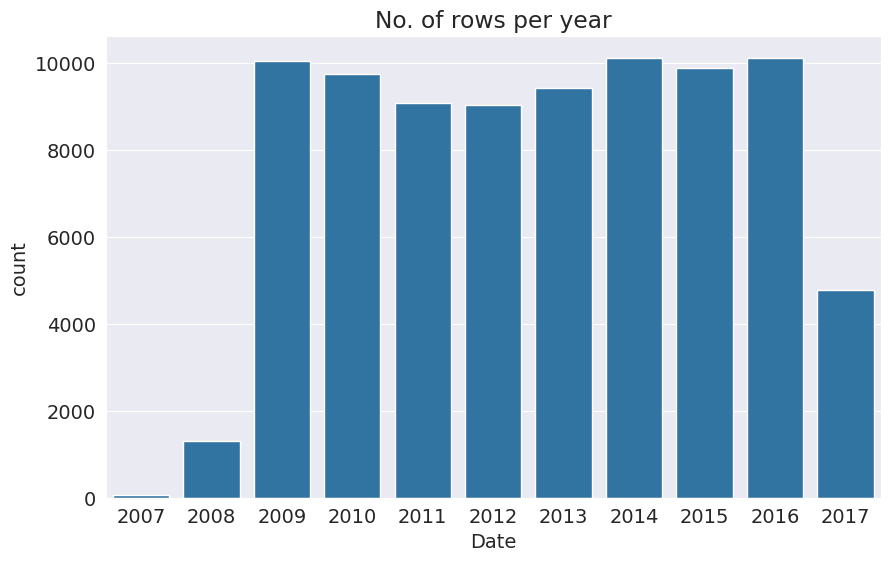

In [ ]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year

# ignoring all the above splitted data frames
train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [ ]:
print('train_df.shape: ',train_df.shape)
print('test_df.shape: ',test_df.shape)
print('val_dff.shape: ',val_df.shape)

train_df.shape:  (58806, 23)
test_df.shape:  (14898, 23)
val_dff.shape:  (9886, 23)


While not a perfect 60-20-20 split, we have ensured the test validation and test sets both contain data for all 12 months of the year.

In [ ]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86288,2014-12-27,Brisbane,20.9,23.4,7.2,8.6,0.0,SW,30.0,SW,...,89.0,90.0,1014.5,1013.9,8.0,8.0,21.9,21.4,Yes,Yes
86289,2014-12-28,Brisbane,19.6,27.0,22.4,0.2,0.3,WSW,13.0,SW,...,95.0,74.0,1014.8,1011.4,8.0,7.0,21.1,26.0,Yes,Yes
86290,2014-12-29,Brisbane,21.0,29.9,6.0,1.6,4.8,ENE,20.0,NaN,...,78.0,71.0,1010.8,1006.9,7.0,7.0,26.2,28.4,Yes,No
86291,2014-12-30,Brisbane,22.1,35.5,1.0,5.2,11.7,SSE,22.0,WNW,...,70.0,51.0,1009.4,1005.6,5.0,2.0,29.0,34.0,No,No


In [ ]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2498,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,...,46.0,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,No,No
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86872,2016-08-02,Brisbane,12.6,23.8,0.0,4.0,2.3,NNW,22.0,SSE,...,72.0,63.0,1015.0,1010.5,7.0,7.0,16.6,22.3,No,Yes
86873,2016-08-03,Brisbane,13.8,19.3,8.6,2.0,10.2,NaN,NaN,W,...,67.0,47.0,1009.8,1007.4,5.0,2.0,16.2,17.4,Yes,No
86874,2016-08-04,Brisbane,11.7,20.8,0.8,6.8,4.4,WSW,41.0,SW,...,64.0,54.0,1014.3,1016.4,7.0,7.0,17.5,18.8,No,No
86875,2016-08-05,Brisbane,11.6,20.9,0.2,4.0,9.1,SSW,30.0,SSW,...,59.0,42.0,1024.8,1022.8,1.0,3.0,16.7,20.4,No,No


In [ ]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86653,2015-12-27,Brisbane,23.6,31.2,0.8,8.8,0.8,SE,26.0,NNE,...,65.0,76.0,1012.7,1010.5,8.0,8.0,28.1,27.6,No,No
86654,2015-12-28,Brisbane,20.1,29.0,0.8,5.8,5.1,SSE,35.0,SE,...,51.0,56.0,1017.1,1014.8,6.0,7.0,25.6,25.9,No,No
86655,2015-12-29,Brisbane,18.5,26.5,0.0,9.0,8.2,SSE,33.0,S,...,51.0,51.0,1016.9,1014.8,4.0,6.0,23.4,25.2,No,No
86656,2015-12-30,Brisbane,19.1,29.8,0.0,8.0,11.6,SSE,33.0,S,...,47.0,48.0,1015.9,1013.5,3.0,3.0,26.2,27.1,No,No


***Identifying input and target columns***

Often, not all the cols in a dataset are useful for training the model.In the current dataset, we can ignore the Date col, since we only want to weather conditions to make a prediction about wh=eather it will rain the next day.

In [ ]:
input_cols = list(train_df.columns)[1:-1]  #skipping date and target cols
target_col = 'RainTomorrow'

In [ ]:
target_col

'RainTomorrow'

In [ ]:
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

We can now create inputs and targets for the training, validation sets for further processing and model training.

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86288,Brisbane,20.9,23.4,7.2,8.6,0.0,SW,30.0,SW,SW,...,6.0,89.0,90.0,1014.5,1013.9,8.0,8.0,21.9,21.4,Yes
86289,Brisbane,19.6,27.0,22.4,0.2,0.3,WSW,13.0,SW,SW,...,4.0,95.0,74.0,1014.8,1011.4,8.0,7.0,21.1,26.0,Yes
86290,Brisbane,21.0,29.9,6.0,1.6,4.8,ENE,20.0,NaN,ENE,...,7.0,78.0,71.0,1010.8,1006.9,7.0,7.0,26.2,28.4,Yes
86291,Brisbane,22.1,35.5,1.0,5.2,11.7,SSE,22.0,WNW,N,...,6.0,70.0,51.0,1009.4,1005.6,5.0,2.0,29.0,34.0,No


In [ ]:
train_targets


0         No
1         No
2         No
3         No
4         No
        ... 
86288    Yes
86289    Yes
86290     No
86291     No
86292    Yes
Name: RainTomorrow, Length: 58806, dtype: object

In [ ]:
type(train_inputs )

pandas.core.frame.DataFrame

In [ ]:
type(train_targets)

pandas.core.series.Series

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
# otherwise you can manually type the col names

In [ ]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,58565.000000,58670.000000,58806.000000,36135.000000,31480.000000,54555.000000,58050.000000,57876.000000,58137.00000,58196.000000,52174.000000,52168.000000,38579.000000,37834.000000,58274.000000,58295.000000
mean,11.096353,22.008273,2.353770,4.865344,7.244285,39.829658,13.515814,18.253058,71.40580,52.782098,1018.110093,1015.788577,4.482853,4.618808,15.652665,20.576195
std,6.070571,6.738131,8.087701,3.603578,3.855086,14.436481,9.363478,9.329589,17.93895,20.526481,7.037206,6.919778,2.876884,2.663671,5.967191,6.552452
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.00000,1.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,6.800000,17.200000,0.000000,2.400000,4.200000,30.000000,7.000000,11.000000,60.00000,38.000000,1013.400000,1011.200000,1.000000,2.000000,11.400000,16.000000
50%,11.100000,21.500000,0.000000,4.000000,8.000000,37.000000,13.000000,17.000000,72.00000,53.000000,1018.200000,1015.900000,5.000000,5.000000,15.700000,20.100000
75%,15.800000,26.300000,0.800000,6.600000,10.300000,48.000000,19.000000,24.000000,85.00000,67.000000,1022.900000,1020.500000,7.000000,7.000000,20.000000,24.700000
max,30.500000,47.300000,371.000000,64.800000,14.300000,126.000000,87.000000,83.000000,100.00000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.100000


Do the ranges of numeric cols seem reasonable? If not, we may have to do some data cleaning as well.

In [ ]:
train_inputs[categorical_cols].nunique()

Location       29
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

**Imputing Missing Numeric Data**

Machine learning models cannot work with missing numerical data. The process of filling missing values is aclled imputation.

there are several techniques for imputation, but we will use the mostbasic one: replacing missing values with the average value in the col using the SimpleImputer class from the sklearn impute

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
?SimpleImputer
#help

In [ ]:
imputer = SimpleImputer(strategy = 'mean') #imputer is a object

Before we perform imputation, lets check the no. of missing values in each numeric column

In [ ]:
raw_df[numeric_cols].isna().sum()
# gives no. of rows having missing dataset

MinTemp            345
MaxTemp            205
Rainfall             0
Evaporation      37788
Sunshine         44403
WindGustSpeed     5470
WindSpeed9am       863
WindSpeed3pm      1651
Humidity9am       1070
Humidity3pm       1615
Pressure9am       9455
Pressure3pm       9459
Cloud9am         31216
Cloud3pm         32262
Temp9am            585
Temp3pm           1183
dtype: int64

In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp            241
MaxTemp            136
Rainfall             0
Evaporation      22671
Sunshine         27326
WindGustSpeed     4251
WindSpeed9am       756
WindSpeed3pm       930
Humidity9am        669
Humidity3pm        610
Pressure9am       6632
Pressure3pm       6638
Cloud9am         20227
Cloud3pm         20972
Temp9am            532
Temp3pm            511
dtype: int64

the first step in imputation is to fit the imputer to the data i.e, compute the choosen statistic (e.g mean) for each col in the dataset.

In [ ]:
raw_df[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86872,12.6,23.8,0.0,4.0,2.3,22.0,2.0,6.0,72.0,63.0,1015.0,1010.5,7.0,7.0,16.6,22.3
86873,13.8,19.3,8.6,2.0,10.2,NaN,7.0,22.0,67.0,47.0,1009.8,1007.4,5.0,2.0,16.2,17.4
86874,11.7,20.8,0.8,6.8,4.4,41.0,11.0,13.0,64.0,54.0,1014.3,1016.4,7.0,7.0,17.5,18.8
86875,11.6,20.9,0.2,4.0,9.1,30.0,9.0,11.0,59.0,42.0,1024.8,1022.8,1.0,3.0,16.7,20.4


In [ ]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

We just not fit the imputer into the data, we just calculated the statistics

After calling fit, the computed statistic for each column is stored in the statistics_property of imputer.

In [ ]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
list(imputer.statistics_)

[11.241331010871523,
 22.1629729567668,
 2.3557255652590023,
 5.025225972664948,
 7.2380075024880695,
 39.64824628776242,
 13.430633287802047,
 18.1638291900072,
 71.78742123121667,
 52.94267764562367,
 1018.23452889998,
 1015.9203638423874,
 4.656929010577768,
 4.726796290523691,
 15.741403529907837,
 20.690903685366536]

The missing  values in th etraining, test and validation sets can now be filled in using the trsform method of imputer.

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

In [ ]:
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column

In [ ]:
imputer.transform(train_inputs[numeric_cols])

array([[13.4       , 22.9       ,  0.6       , ...,  4.72679629,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.72679629,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [21.        , 29.9       ,  6.        , ...,  7.        ,
        26.2       , 28.4       ],
       [22.1       , 35.5       ,  1.        , ...,  2.        ,
        29.        , 34.        ],
       [23.8       , 33.9       ,  0.        , ...,  6.        ,
        31.        , 30.5       ]])

In [ ]:
train_inputs[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.025226,7.238008,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.726796,16.9,21.8
1,7.4,25.1,0.0,5.025226,7.238008,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.656929,4.726796,17.2,24.3
2,12.9,25.7,0.0,5.025226,7.238008,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.656929,2.000000,21.0,23.2
3,9.2,28.0,0.0,5.025226,7.238008,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.656929,4.726796,18.1,26.5
4,17.5,32.3,1.0,5.025226,7.238008,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86288,20.9,23.4,7.2,8.600000,0.000000,30.0,2.0,6.0,89.0,90.0,1014.5,1013.9,8.000000,8.000000,21.9,21.4
86289,19.6,27.0,22.4,0.200000,0.300000,13.0,2.0,4.0,95.0,74.0,1014.8,1011.4,8.000000,7.000000,21.1,26.0
86290,21.0,29.9,6.0,1.600000,4.800000,20.0,0.0,7.0,78.0,71.0,1010.8,1006.9,7.000000,7.000000,26.2,28.4
86291,22.1,35.5,1.0,5.200000,11.700000,22.0,4.0,6.0,70.0,51.0,1009.4,1005.6,5.000000,2.000000,29.0,34.0


In [ ]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Other imputstation techniques can also be use like meadian of col or taking from otehr cols etc.

There is entire module in scikit learn to do this.

# **Scaling Numeric Features**

Another good practice is to scale numeric features to a small range of values, e.g (0,1) or (-1,1). Scaling numeric features ensures taht no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

the numeric cols in our dataset have varying ranges.

In [ ]:
raw_df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,83245.000000,83385.000000,83590.000000,45802.000000,39187.000000,78120.000000,82727.000000,81939.000000,82520.000000,81975.000000,74135.000000,74131.000000,52374.000000,51328.000000,83005.000000,82407.000000
mean,11.241331,22.162973,2.355726,5.025226,7.238008,39.648246,13.430633,18.163829,71.787421,52.942678,1018.234529,1015.920364,4.656929,4.726796,15.741404,20.690904
std,6.112169,6.868099,8.197308,3.944887,3.848461,14.325814,9.214351,9.232177,17.896311,20.558043,7.138826,7.012159,2.887347,2.685798,6.042002,6.684184
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000
25%,6.900000,17.300000,0.000000,2.400000,4.300000,30.000000,7.000000,11.000000,60.000000,38.000000,1013.500000,1011.300000,1.000000,2.000000,11.400000,16.000000
50%,11.300000,21.700000,0.000000,4.200000,8.000000,37.000000,13.000000,17.000000,73.000000,53.000000,1018.300000,1016.000000,6.000000,5.000000,15.800000,20.200000
75%,15.900000,26.600000,0.800000,6.800000,10.300000,48.000000,19.000000,24.000000,86.000000,67.000000,1023.000000,1020.600000,7.000000,7.000000,20.200000,24.900000
max,31.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.700000,46.700000


Here what happens is the values with higher magnitude tend to dominate the loss, but features having less range or values does not tend to show up to the loss.

Here what dominates the loss also dominates the optimization loss

So just to give everybody a level playing feild, just because we measure rainfall in a certain unit where it gets large values, but we measure a temperature in a certain unit where it gets lowwer values.

We should scale all the features in to a same range of values

Either 0-1 or -1-1 is ok according to the circumstances , but generally we will use 0-1 for classification problems

Lets use MinMaxScaler from sklearn.preprocessing to scale values to the (0,1) range.

In [ ]:
 from sklearn.preprocessing import MinMaxScaler

In [ ]:
?MinMaxScaler

In [ ]:
scaler =  MinMaxScaler()

In [ ]:
# Just like the imputer, it's a two step process
# we should identify the min, max and then scaling according in betwee the range

First, we fit the scaler to the data i.e, compute the range of values for each numeric column.

In [ ]:
raw_df[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86872,12.6,23.8,0.0,4.0,2.3,22.0,2.0,6.0,72.0,63.0,1015.0,1010.5,7.0,7.0,16.6,22.3
86873,13.8,19.3,8.6,2.0,10.2,NaN,7.0,22.0,67.0,47.0,1009.8,1007.4,5.0,2.0,16.2,17.4
86874,11.7,20.8,0.8,6.8,4.4,41.0,11.0,13.0,64.0,54.0,1014.3,1016.4,7.0,7.0,17.5,18.8
86875,11.6,20.9,0.2,4.0,9.1,30.0,9.0,11.0,59.0,42.0,1024.8,1022.8,1.0,3.0,16.7,20.4


In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

We can now inspect the min and max values in each columns

In [ ]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
print('Minimum')
list(scaler.data_min_)

Minimum


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 7.0,
 0.0,
 0.0,
 3.0,
 1.0,
 980.5,
 979.0,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [ ]:
print('Maximum')
list(scaler.data_max_) #they are stred in data min and data max

Maximum


[31.9,
 47.3,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 83.0,
 100.0,
 100.0,
 1040.6,
 1037.9,
 9.0,
 8.0,
 37.7,
 46.7]

we can now seperately scale the training , val and test data seperatetly using transform method of scaler.

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.542079,0.531670,0.001617,0.034657,0.499173,0.289062,0.153846,0.289157,0.701031,0.212121,0.452579,0.477080,0.888889,0.59085,0.536748,0.522073
1,0.393564,0.573896,0.000000,0.034657,0.499173,0.289062,0.030769,0.265060,0.422680,0.242424,0.500832,0.488964,0.517437,0.59085,0.543430,0.570058
2,0.529703,0.585413,0.000000,0.034657,0.499173,0.304688,0.146154,0.313253,0.360825,0.292929,0.450915,0.504244,0.517437,0.25000,0.628062,0.548944
3,0.438119,0.629559,0.000000,0.034657,0.499173,0.132812,0.084615,0.108434,0.432990,0.151515,0.617304,0.573854,0.517437,0.59085,0.563474,0.612284
4,0.643564,0.712092,0.002695,0.034657,0.499173,0.265625,0.053846,0.240964,0.814433,0.323232,0.504160,0.458404,0.777778,1.00000,0.556793,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86288,0.727723,0.541267,0.019407,0.059310,0.000000,0.179688,0.015385,0.072289,0.886598,0.898990,0.565724,0.592530,0.888889,1.00000,0.648107,0.514395
86289,0.695545,0.610365,0.060377,0.001379,0.020690,0.046875,0.015385,0.048193,0.948454,0.737374,0.570715,0.550085,0.888889,0.87500,0.630290,0.602687
86290,0.730198,0.666027,0.016173,0.011034,0.331034,0.101562,0.000000,0.084337,0.773196,0.707071,0.504160,0.473684,0.777778,0.87500,0.743875,0.648752
86291,0.757426,0.773512,0.002695,0.035862,0.806897,0.117188,0.030769,0.072289,0.690722,0.505051,0.480865,0.451613,0.555556,0.25000,0.806236,0.756238


They are scaled now.

# **Encoding Categorical data**

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot -encoding for categorical cols.

In [ ]:
raw_df[categorical_cols].nunique()

Location       29
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We can perform on-hot -encoding using OneHotEncoder class from sklearn.preprocesing

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
?OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
# here we saying that, we dont want sparse matrix, but want a numpy array
# if if any unknown is there, just leave

First, we fit the encoder data i.e, identify the full list of categories across all categorical cols.

In [ ]:
 raw_df2 = raw_df[categorical_cols].fillna('Unknown')
 # all the null values are filled with unknown

In [ ]:
encoder.fit(raw_df2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
encoder.categories_

[array(['Albury', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane',
        'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Melbourne',
        'MelbourneAirport', 'Mildura', 'Moree', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Portland',
        'Richmond', 'Sale', 'Sydney', 'SydneyAirport', 'Tuggeranong',
        'WaggaWagga', 'Watsonia', 'Williamtown', 'Wollongong'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

The encoder has created a list of categories for each of the categorical cols in the dataset.

We can generate col names for each indiviadual category usng get_feature_names_out.

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Albury', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Penrith', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Tuggeranong', 'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown', 'Location_Wollongong', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_Unknown', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', '

All the above cols will be adde to train_inputs, val_inputs and test_inputs

To perform the encoding, we use the transform method of encoder.

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

We can verify that these new cols have been added to our training , test and validation

In [ ]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
2498,Albury,0.715347,0.813820,0.000000,0.034657,0.499173,ENE,0.367188,NaN,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.727723,0.737044,0.001078,0.034657,0.499173,SSE,0.335938,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.665842,0.535509,0.005930,0.034657,0.499173,ENE,0.320312,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.638614,0.547025,0.042049,0.034657,0.499173,SSE,0.250000,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.594059,0.531670,0.018329,0.034657,0.499173,ENE,0.187500,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86872,Brisbane,0.522277,0.548944,0.000000,0.027586,0.158621,NNW,0.117188,SSE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86873,Brisbane,0.551980,0.462572,0.023181,0.013793,0.703448,NaN,0.255064,W,WNW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
86874,Brisbane,0.500000,0.491363,0.002156,0.046897,0.303448,WSW,0.265625,SW,S,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86875,Brisbane,0.497525,0.493282,0.000539,0.027586,0.627586,SSW,0.179688,SSW,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Now we are done with preprocessing, which should be done before training a model

In [ ]:
print('train_inputs: ',train_inputs.shape)
print('train_targets: ',train_targets.shape)
print('val_inputs: ',val_inputs.shape)
print('val_targets: ',val_targets.shape)
print('test_inputs: ',test_inputs.shape)
print('test_targets ',test_targets.shape)

train_inputs:  (58806, 103)
train_targets:  (58806,)
val_inputs:  (9886, 103)
val_targets:  (9886,)
test_inputs:  (14898, 103)
test_targets  (14898,)


We can save this as csv, a data frame, but efficient way is to use parquet format

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [ ]:
# to actually store targets properly , we take dataframes
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

We can read the data back using pd.read_parquet

In [ ]:
# whenever we want restart the above preprocessing steps
# just below 6 lines can be written to save time
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')
val_targets = pd.read_parquet('val_targets.parquet')
tets_targets = pd.read_parquet('test_targets.parquet')

Now all the preprocessing is done, and we are ready to train our model, now our data contain, mostly numeric cols, lets check

In [ ]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,Albury,0.542079,0.531670,0.001617,0.034657,0.499173,W,0.289062,W,WNW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Albury,0.393564,0.573896,0.000000,0.034657,0.499173,WNW,0.289062,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Albury,0.529703,0.585413,0.000000,0.034657,0.499173,WSW,0.304688,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Albury,0.438119,0.629559,0.000000,0.034657,0.499173,NE,0.132812,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.643564,0.712092,0.002695,0.034657,0.499173,W,0.265625,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86288,Brisbane,0.727723,0.541267,0.019407,0.059310,0.000000,SW,0.179688,SW,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
86289,Brisbane,0.695545,0.610365,0.060377,0.001379,0.020690,WSW,0.046875,SW,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
86290,Brisbane,0.730198,0.666027,0.016173,0.011034,0.331034,ENE,0.101562,None,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86291,Brisbane,0.757426,0.773512,0.002695,0.035862,0.806897,SSE,0.117188,WNW,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
val_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
2133,Albury,0.492574,0.735125,0.000000,0.034657,0.499173,WSW,0.179688,ESE,W,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2134,Albury,0.594059,0.852207,0.000000,0.034657,0.499173,NE,0.382812,ESE,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2135,Albury,0.633663,0.827255,0.000000,0.034657,0.499173,NNE,0.320312,NE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2136,Albury,0.853960,0.727447,0.000000,0.034657,0.499173,NNE,0.265625,ESE,W,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2137,Albury,0.680693,0.767754,0.000000,0.034657,0.499173,E,0.203125,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86653,Brisbane,0.794554,0.690979,0.002156,0.060690,0.055172,SE,0.148438,NNE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86654,Brisbane,0.707921,0.648752,0.002156,0.040000,0.351724,SSE,0.218750,SE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86655,Brisbane,0.668317,0.600768,0.000000,0.062069,0.565517,SSE,0.203125,S,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86656,Brisbane,0.683168,0.664107,0.000000,0.055172,0.800000,SSE,0.203125,S,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
train_targets

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
86288,Yes
86289,Yes
86290,No
86291,No


In [ ]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Albury', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Penrith', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Tuggeranong', 'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown', 'Location_Wollongong', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindG

In [ ]:
val_targets

,RainTomorrow
2133,No
2134,No
2135,No
2136,No
2137,No
...,...
86653,No
86654,No
86655,No
86656,No


# **Training a Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
?LogisticRegression

In [ ]:
model = LogisticRegression(solver = 'liblinear')

We can train the model using model.fit

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(solver='liblinear')

**model.fit uses the following workflow for training the model**

1. We initialize a model with som random parameters (weights & biases).

2. We pass some inputs into the model to obtain predictions.

3. We compare the model's predictions with the actual targets using the loss function.

4. We can use optimization technique (like least square, gradient descent etc.,) to reduce the loss by adjusting th weights & biases of the model.

5. We repeat steps 1 to 4 till the ptredictions from the model are good enough.

In [ ]:
print(model.coef_.tolist())

[[0.6483419154273292, -2.722682651950065, 3.053309820306601, 0.5050273500193746, -1.5859164665847738, 6.085091396271765, -0.9041090574846373, -1.147150883255513, -0.12152883873012937, 6.321769139923016, 5.267668030476931, -7.9400319407740065, -0.06433111136917227, 1.1987828799801457, 0.17267380729584217, 3.3073576896010684, 0.4232953014164646, 0.22556371112682655, -0.32577841068061125, 0.14708594637741212, 0.30043539323147356, 0.07034066765968783, 0.1447878885104954, -0.14727988184090737, -0.039738310421072835, -0.30442311393366406, -0.5208506987705996, 0.0876670342862267, -0.06686610087731862, -0.7294117432078833, -0.4455740225656241, 0.0058131929187916825, -0.5889539393690338, -0.5482773689577927, 0.34280446736153275, -0.006869525761394488, 0.12883651453846195, -0.27691650931464373, -0.10054567748544582, -0.18048996560774003, 0.3525469431924445, 0.1754621151672415, -0.24393736200929697, -0.08492054464102795, -0.8975270534620804, -0.25698815013960513, -0.209800191246311, -0.0831693118

In [ ]:
print(model.intercept_)

[-3.10372105]


Each weight is applied to the value in a specific col of th eiput. Higher the weight, greater the impact of th ecol on the prediction.

# ***Making Predictions and evaluationg the Model***

In [ ]:
# lets see how these weights are associated with the cols
# by creating a dataframe, we can observe clearly
n = len(model.coef_.tolist())

weight_df = pd.DataFrame({
    'feature' : (numeric_cols + encoded_cols),
    'weight' : model.coef_.tolist()[0]
})

<Axes: xlabel='weight', ylabel='feature'>

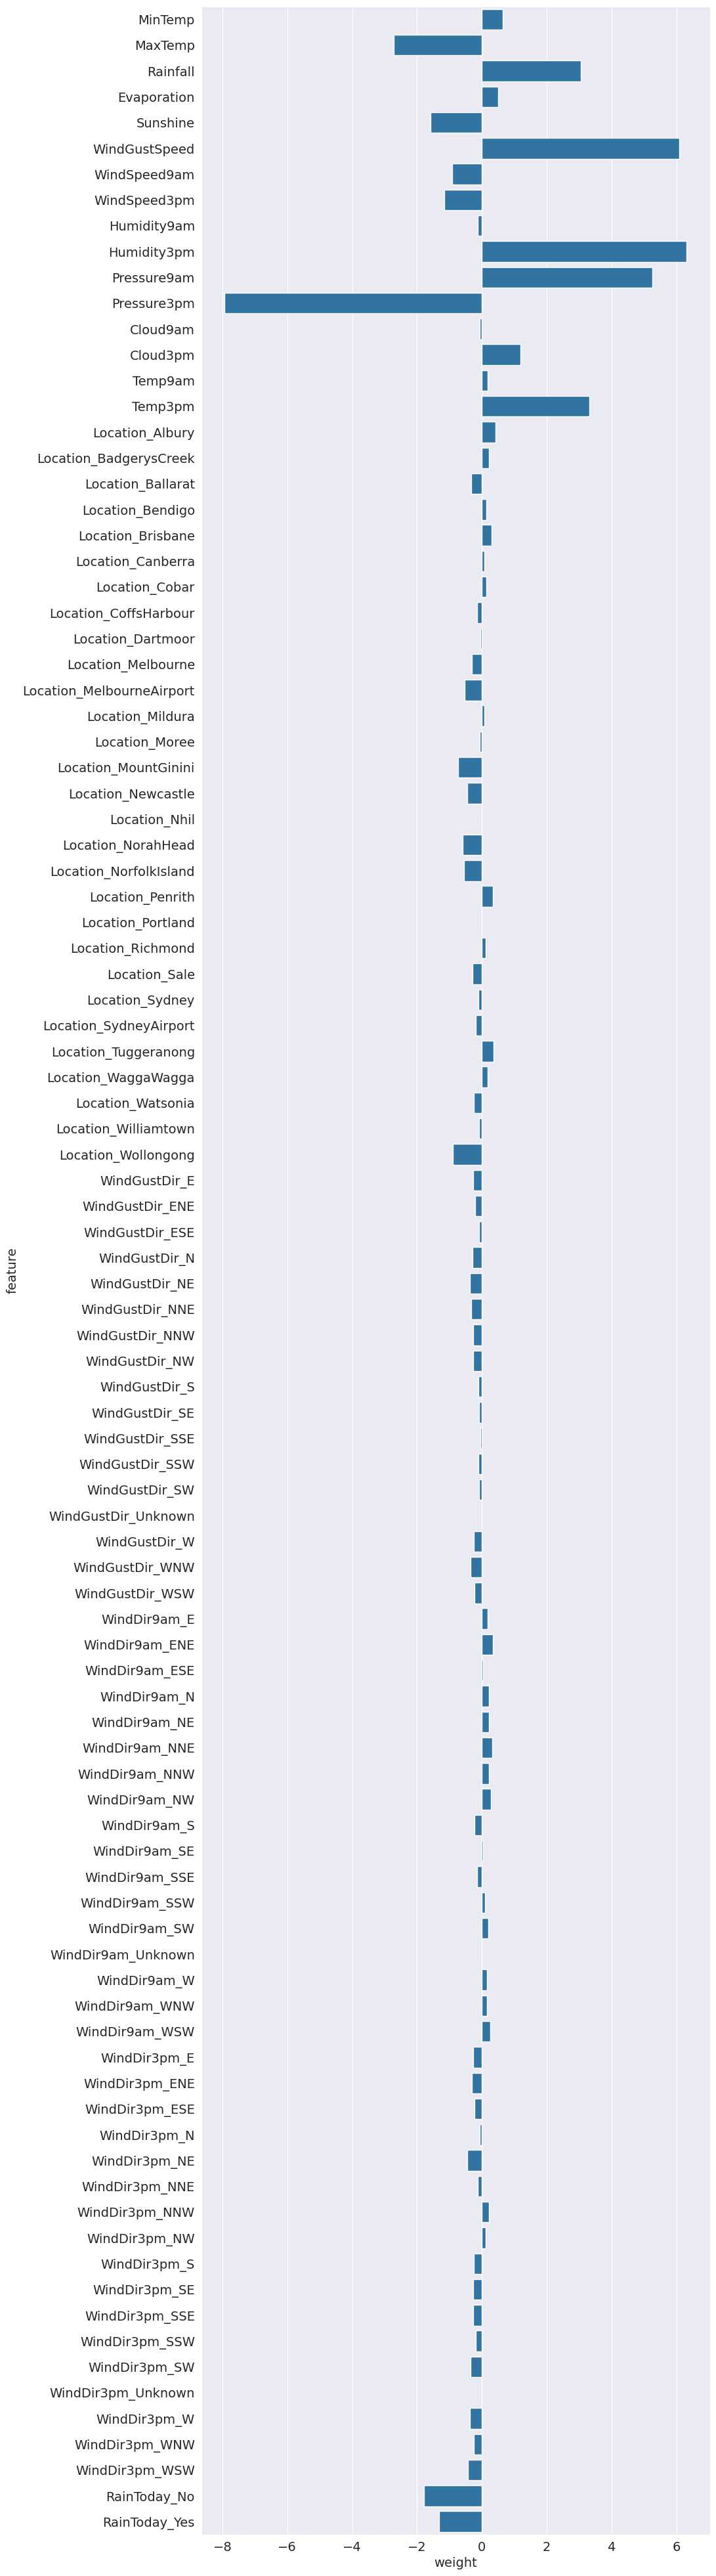

In [ ]:
# We can visualize the feature rates with bar H
plt.figure(figsize=(10,50))
sns.barplot(data=weight_df, x='weight', y='feature')

<Axes: xlabel='weight', ylabel='feature'>

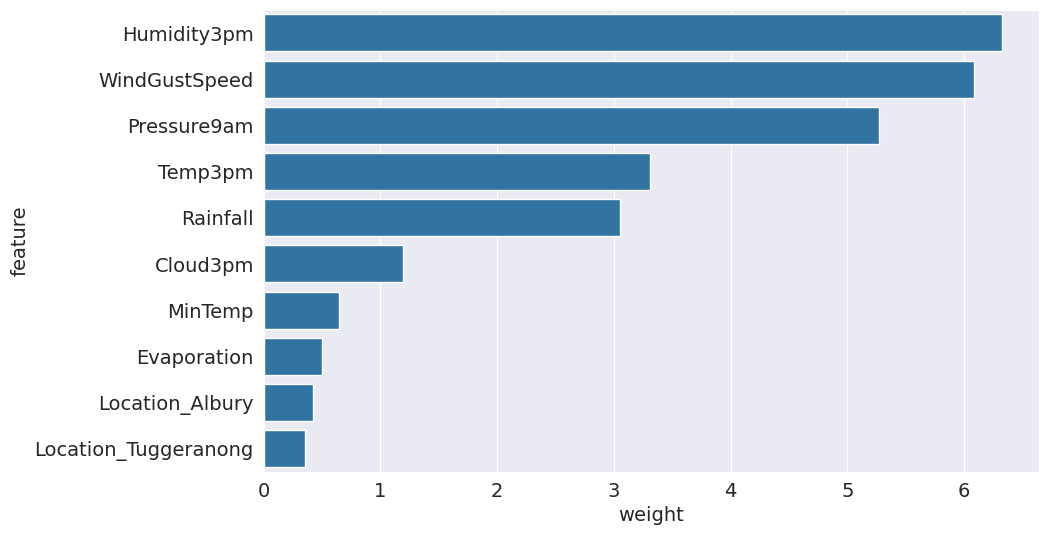

In [ ]:
sns.barplot(data=weight_df.sort_values('weight',ascending=False).head(10), x='weight', y='feature')

**Making Predictions and Evaluating the Model**

In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_preds = model.predict(X_train)

In [ ]:
train_preds

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [ ]:
train_targets

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
86288,Yes
86289,Yes
86290,No
86291,No


**We can output a probabilistic prediction using predict_proba.**

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

# each one have two values, because one is the probability for no and other one for yes

array([[0.95432691, 0.04567309],
       [0.94162374, 0.05837626],
       [0.96245832, 0.03754168],
       ...,
       [0.35419005, 0.64580995],
       [0.8600922 , 0.1399078 ],
       [0.8094692 , 0.1905308 ]])

The numbers above indicate the probalities for the target classes "No" and "Yes"

In [ ]:
model.classes_

array(['No', 'Yes'], dtype=object)

We can test the accuarcy of the model's prediction by computing the percentage of matching values in train_preds and train_targets.

This can be done using the accuracy_score function from sklearn.metrics.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)
# Now the accuracy score is a good measure to just get an overall
# idea of how well the model done

0.8462911947760433

In [ ]:
# But what we can also do is to break down this into confusion matrix

We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

**Actual   -   Predicted**

No         -   No   -> true negative

yes - yes -> true positive

type1 error -> false positive

no - yes

type2 error -> false negative

yes - no









In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(train_targets, train_preds, normalize='true')
cm  # these are percentages

array([[0.94574188, 0.05425812],
       [0.49577231, 0.50422769]])

In [ ]:
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklables=classes, yticklabels=classes)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Normalized Confusion Matrix')
# plt.show()


In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 84.63%


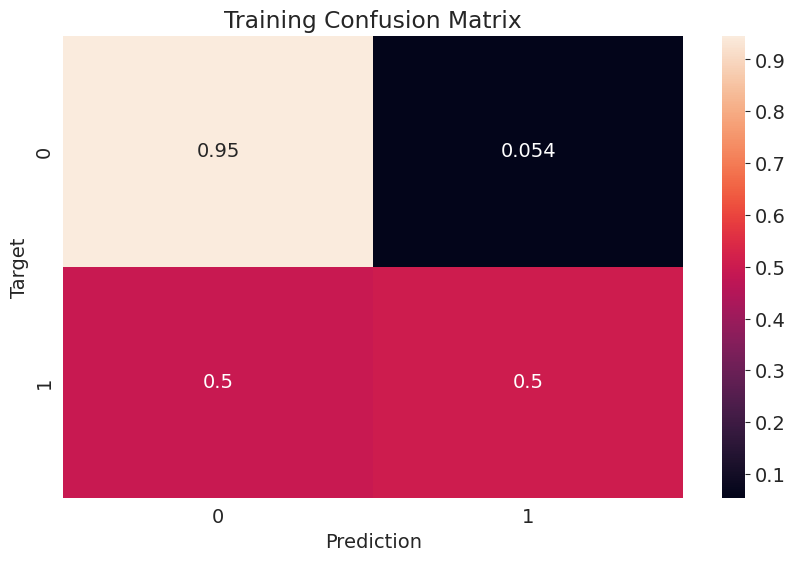

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 83.90%


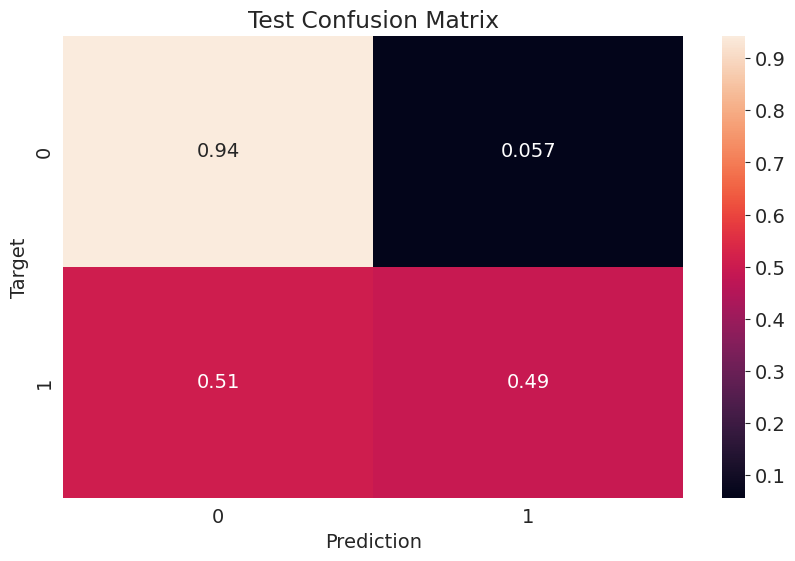

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before.

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whather a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let u screate two models one that guesses randomly and another that always return "No". Both of these models completly ignore the inputs given to them.

In [ ]:
def random_guess(inputs):
  return np.random.choice(["No","Yes"],len(inputs))

In [ ]:
def all_no(inputs):
  return np.full(len(inputs),"No")

In [ ]:
random_guess(X_val)

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'Yes'], dtype='<U3')

In [ ]:
all_no(X_val)    # these are models , but they didn;'t actually looked into the data

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

We just done preprocessing and compared with a random model.

Let's check the accuracies of these two models over the test cases.

In [ ]:
accuracy_score(test_targets, random_guess(X_test))

0.49315344341522355

In [ ]:
accuracy_score(test_targets, all_no(X_test))

0.7702376157873541

Our random model achieves an accuracy of 50% and our "always No" model achieves an accuracy of 77%.

Thankfully, our model is better than a "dumb" or "random" model. This is not always the case, so it's a good practice to benchmark anyy model you train against such baseline models.

# Making predictions on a single input

Once the model has been trained  to a satisfactory accuarcy, it can be used to make predictions on new data. Consider the following dictionary containing data collecetd from the KAtherine weather department.

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

The first step is to convert the dictionary into a pandas dataframe, similar to raw_df. This can be done by passing a list containing the given dictionary to the pd.DataFrame construtor

In [ ]:
new_input_df = pd.DataFrame([new_input])

In [ ]:
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,...,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes


We ahve now created a pandas dataframe with the same cols as raw_df (except rainTommorrow, which needs to be predicted). The dataframe contains just one row of data, containing the given input.

We must now apply the same transformations applied while training the model.

1. Imputation of missing values using the imputer created earlier.

2. Scaling numeric features using the scaler created earlier.

3. encoding categorical features using the encoder created earlier.

In [ ]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [ ]:
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,2021-06-19,Katherine,0.784653,0.729367,0.027493,0.028966,0.499173,NNW,0.351562,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_new_input = new_input_df[numeric_cols+encoded_cols]
X_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.784653,0.729367,0.027493,0.028966,0.499173,0.351562,0.1,0.240964,0.886598,0.575758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We can now make a prediction using model.predict

In [ ]:
prediction = model.predict(X_new_input)[0]
prediction

'Yes'

In [ ]:
type(prediction)

str

In [ ]:
prediction = model.predict(X_new_input)
prediction

array(['Yes'], dtype=object)

Our model predicts that it will rain tomorrow in Katherine! We can also check the probobility of the prediction.

In [ ]:
prob = model.predict_proba(X_new_input)
prob

array([[0.27857437, 0.72142563]])

In [ ]:
prob = model.predict_proba(X_new_input)[0]
prob

array([0.27857437, 0.72142563])

Looks like our model isn't too confident about its prediction!
lets define a helper function to make predictions for individual inputs

In [ ]:
#def predict_inputs(single_input):
